In [1]:
import warnings
import os
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import tensorflow as tf
from tensorflow.keras import utils, datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import pickle
import csv
import itertools
from collections import defaultdict
import time
import pandas as pd
import math
from tqdm import tqdm
import dill

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

4 Physical GPUs, 1 Logical GPUs


In [3]:
import urllib.request
if not os.path.exists("lab11_1_lib.py"):
    urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/11-1_CNN/lab11_1_lib.py", "lab11_1_lib.py")

from lab11_1_lib import draw_timeline

In [4]:
# Download and prepare the MNIST dataset
(train_image, train_label), (test_image, test_label) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_image, test_image = train_image / 255.0, test_image / 255.0
print('shape of train_image:', train_image.shape)
print('shape of train_label:', train_label.shape)

shape of train_image: (60000, 28, 28)
shape of train_label: (60000,)


In [5]:
# flating the training data for dense layers
train_image_1 = train_image.reshape((60000, -1))
test_image_1 = test_image.reshape((10000, -1))
print(train_image_1.shape)
print(test_image_1.shape)

(60000, 784)
(10000, 784)


In [6]:
model_1 = models.Sequential()
model_1.add(layers.Dense(10, activation='softmax',input_shape=(784,)))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
# compile the model and train it for 5 epochs
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(train_image_1, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7286 - accuracy: 0.8112
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.9123
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2629 - accuracy: 0.9272


In [8]:
_, test_acc_1 = model_1.evaluate(test_image_1, test_label, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_1)

Testing Accuracy : 0.9241


In [9]:
# reshaping the training data to 3 dimensions
train_image_2 = train_image.reshape((60000, 28, 28, 1))
test_image_2 = test_image.reshape((10000, 28, 28, 1))
print(train_image_2.shape)
print(test_image_2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='valid', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='valid', activation='relu'))

In [11]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10, activation='softmax'))

In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [14]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(train_image_2, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5255 - accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0913 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0595 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0455 - accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0396 - accuracy: 0.9882


In [15]:
_, test_acc_2 = model_2.evaluate(test_image_2, test_label, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_2)

Testing Accuracy : 0.9916


In [16]:
# Loading Data

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# convert class vectors to binary vectors
Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

170500096/170498071 [==============================] - 14s 0us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


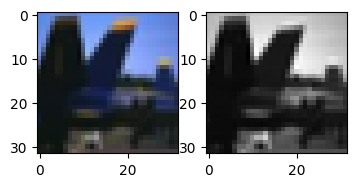

In [17]:
# transform a 3-channel image into one channel
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r = np.asarray(.3, dtype=dtype)
    g = np.asarray(.59, dtype=dtype)
    b = np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

# plot a randomly chosen image
img = round(np.random.rand() * X_train.shape[0])
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(
    X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [18]:
def getHOGfeat(image,
               stride=8,
               orientations=8,
               pixels_per_cell=(8, 8),
               cells_per_block=(2, 2)):
    cx, cy = pixels_per_cell
    bx, by = cells_per_block
    sx, sy, sz = image.shape
    n_cellsx = int(np.floor(sx // cx))  # number of cells in x
    n_cellsy = int(np.floor(sy // cy))  # number of cells in y
    n_blocksx = (n_cellsx - bx) + 1
    n_blocksy = (n_cellsy - by) + 1
    gx = np.zeros((sx, sy), dtype=np.double)
    gy = np.zeros((sx, sy), dtype=np.double)
    eps = 1e-5
    grad = np.zeros((sx, sy, 2), dtype=np.double)
    for i in range(1, sx - 1):
        for j in range(1, sy - 1):
            gx[i, j] = image[i, j - 1] - image[i, j + 1]
            gy[i, j] = image[i + 1, j] - image[i - 1, j]
            grad[i, j, 0] = np.arctan(gy[i, j] / (gx[i, j] + eps)) * 180 / math.pi
            if gx[i, j] < 0:
                grad[i, j, 0] += 180
            grad[i, j, 0] = (grad[i, j, 0] + 360) % 360
            grad[i, j, 1] = np.sqrt(gy[i, j] ** 2 + gx[i, j] ** 2)
    normalised_blocks = np.zeros((n_blocksy, n_blocksx, by * bx * orientations))
    for y in range(n_blocksy):
        for x in range(n_blocksx):
            block = grad[y * stride:y * stride + 16, x * stride:x * stride + 16]
            hist_block = np.zeros(32, dtype=np.double)
            eps = 1e-5
            for k in range(by):
                for m in range(bx):
                    cell = block[k * 8:(k + 1) * 8, m * 8:(m + 1) * 8]
                    hist_cell = np.zeros(8, dtype=np.double)
                    for i in range(cy):
                        for j in range(cx):
                            n = int(cell[i, j, 0] / 45)
                            hist_cell[n] += cell[i, j, 1]
                    hist_block[(k * bx + m) * orientations:(k * bx + m + 1) * orientations] = hist_cell[:]
            normalised_blocks[y, x, :] = hist_block / np.sqrt(
                hist_block.sum() ** 2 + eps)
    return normalised_blocks.ravel()

In [19]:
X_train_hog = []
X_test_hog = []

print('This will take some minutes.')

for img in tqdm(X_train_gray):
    img_hog = getHOGfeat(img)
    X_train_hog.append(img_hog)

for img in tqdm(X_test_gray):
    img_hog = getHOGfeat(img)
    X_test_hog.append(img_hog)
    
X_train_hog_array = np.asarray(X_train_hog)
X_test_hog_array = np.asarray(X_test_hog)

This will take some minutes.


100%|██████████| 10000/10000 [02:00<00:00, 83.10it/s]


In [20]:
# # KNN
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.metrics import accuracy_score

# # p=2 and metric='minkowski' means the Euclidean Distance
# knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

# knn.fit(X_train_hog_array, y_train.ravel())
# y_pred = knn.predict(X_test_hog_array)
# print('[KNN]')
# print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
# print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 5334
Accuracy: 0.47


In [21]:
# # SVM
# from sklearn.svm import SVC 

# print('This will take some minutes.')
# start_time = time.time()

# # C is the hyperparameter for the error penalty term
# # gamma is the hyperparameter for the rbf kernel
# svm_linear = SVC(kernel='linear', random_state=0, gamma=0.2, C=10.0)

# svm_linear.fit(X_train_hog_array, y_train.ravel())
# y_pred = svm_linear.predict(X_test_hog_array)
# print('[Linear SVC]')
# print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
# print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

# print('{:.2f} sec.'.format(time.time()-start_time))

This will take some minutes.
[Linear SVC]
Misclassified samples: 4940
Accuracy: 0.51
649.32 sec.


In [22]:
model_3 = models.Sequential()

#The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
model_3.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model_3.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_3.add(layers.BatchNormalization())
                
model_3.add(layers.Flatten())
model_3.add(layers.Dense(384, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(192, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [23]:
model_3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
_, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_3)

Epoch 1/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9082 - accuracy: 0.3502 - val_loss: 1.2610 - val_accuracy: 0.5595
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1588 - accuracy: 0.5894 - val_loss: 1.0036 - val_accuracy: 0.6679
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9484 - accuracy: 0.6670 - val_loss: 1.0161 - val_accuracy: 0.6548
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8278 - accuracy: 0.7153 - val_loss: 0.9192 - val_accuracy: 0.6812
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7306 - accuracy: 0.7457 - val_loss: 0.7950 - val_accuracy: 0.7246
Testing Accuracy : 0.7246


In [24]:
# number of samples
n_samples = 200

# an array with shape (n_samples, 5)
raw_data_a = np.random.rand(n_samples, 5)
# a list with length of n_samples from 0 to n_samples-1
raw_data_b = np.arange(n_samples)
print(raw_data_a.shape, raw_data_b.shape)

(200, 5) (200,)


In [25]:
# this tells the dataset that each row of raw_data_a is corresponding to each element of raw_data_b
raw_dataset = tf.data.Dataset.from_tensor_slices((raw_data_a, raw_data_b))

In [26]:
# Here, we print the first 8 batches.
for i,elem in enumerate(raw_dataset):
    print("Batch ", i, ", b are ", elem)
    if i==7:
        break

Batch  0 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.43539956, 0.00506565, 0.98644897, 0.78440606, 0.29490015])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.48580055, 0.794433  , 0.16131837, 0.20065087, 0.34292575])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.18233817, 0.92311146, 0.40593751, 0.31472856, 0.29257028])>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
Batch  3 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.13467984, 0.87299602, 0.65002907, 0.59365984, 0.49341016])>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
Batch  4 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.85498532, 0.07293431, 0.93044152, 0.75865421, 0.18699617])>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
Batch  5 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.14014767, 0.06128635, 0.31925296

In [27]:
# Here, we print the first 8 batches.
it = iter(raw_dataset)
for i in range(8):
    print("Batch ", i, ", b are ", next(it))

Batch  0 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.43539956, 0.00506565, 0.98644897, 0.78440606, 0.29490015])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.48580055, 0.794433  , 0.16131837, 0.20065087, 0.34292575])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.18233817, 0.92311146, 0.40593751, 0.31472856, 0.29257028])>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
Batch  3 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.13467984, 0.87299602, 0.65002907, 0.59365984, 0.49341016])>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
Batch  4 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.85498532, 0.07293431, 0.93044152, 0.75865421, 0.18699617])>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
Batch  5 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.14014767, 0.06128635, 0.31925296

In [28]:
def preprocess_function(one_row_a, one_b):
    """
        Input: one slice of the dataset
        Output: modified slice
    """
    # Do some data preprocessing, you can also input filenames and load data in here
    # Here, we transform each row of raw_data_a to its sum and mean
    one_row_a = [tf.reduce_sum(one_row_a), tf.reduce_mean(one_row_a)]

    return one_row_a, one_b

raw_dataset = raw_dataset.map(preprocess_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [29]:
it = iter(raw_dataset)
for i in range(8):
    print("Batch ", i, ", b are ", next(it))

Batch  0 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.50622039, 0.50124408])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.98512853, 0.39702571])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.11868597, 0.42373719])>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
Batch  3 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.74477493, 0.54895499])>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)
Batch  4 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.80401154, 0.56080231])>, <tf.Tensor: shape=(), dtype=int64, numpy=4>)
Batch  5 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.43625711, 0.28725142])>, <tf.Tensor: shape=(), dtype=int64, numpy=5>)
Batch  6 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.51088065, 0.50217613])>, <tf.Tensor: shape=(), dtype=int64, numpy=6>)

In [30]:
dataset = raw_dataset.shuffle(16)

In [31]:
idxs = []
for i,elem in enumerate(dataset):
    print("Batch ", i, ", b are ", elem)
    idxs.append(elem[1].numpy())
    if i==7:
        break
        
print("\nThe order of the first 8 shuffle from [0, 1, 2, 3, 4, 5, 6, 7] to ",idxs)

Batch  0 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.06353583, 0.21270717])>, <tf.Tensor: shape=(), dtype=int64, numpy=12>)
Batch  1 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.98512853, 0.39702571])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.59853471, 0.31970694])>, <tf.Tensor: shape=(), dtype=int64, numpy=9>)
Batch  3 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.61269587, 0.52253917])>, <tf.Tensor: shape=(), dtype=int64, numpy=13>)
Batch  4 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.20837076, 0.64167415])>, <tf.Tensor: shape=(), dtype=int64, numpy=8>)
Batch  5 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.11868597, 0.42373719])>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
Batch  6 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.74477493, 0.54895499])>, <tf.Tensor: shape=(), dtype=int64, numpy=3